## Read Data
### Resources Used
- [Waveform Database Software Package](https://github.com/MIT-LCP/wfdb-python)
- [WFDB Demo Scripts](https://github.com/MIT-LCP/wfdb-python/blob/main/demo.ipynb)
- [WFDB EDF API](https://wfdb.readthedocs.io/en/latest/convert.html#module-wfdb.io.convert.edf)
- [MNE Library Install](https://mne.tools/stable/install/index.html)
- [MNE Python](https://github.com/mne-tools/mne-python/blob/maint/0.20/mne/datasets/sleep_physionet/age.py#L18-L111)
- [Physionet Sleep-EDF Database](https://www.physionet.org/content/sleep-edfx/1.0.0/)

In [ ]:
%pip install mne
%pip install wfdb

In [2]:
import wfdb
import wfdb.io.convert

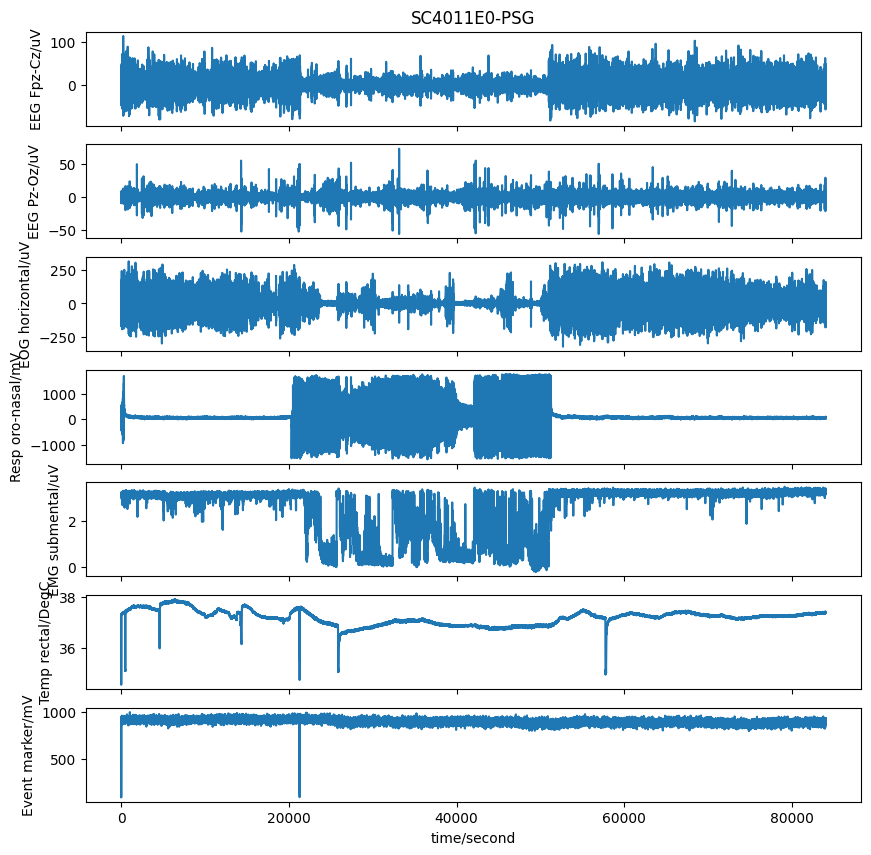

In [24]:
#Plot data and display data
# record = wfdb.io.convert.edf.read_edf('sleep-edf-database/sleep-cassette/SC4001E0-PSG.edf')
record = wfdb.io.convert.edf.read_edf('sleep-edf-database/sleep-cassette/SC4011E0-PSG.edf')
wfdb.plot_wfdb(record=record, title='SC4011E0-PSG', figsize=(10,10)) #plot signals
# display(record.__dict__)

In [21]:
#each entry (i) is a second, and info in first index is EEG data
record1EegData = list()
for i in record.__dict__['p_signal']:
    record1EegData.append(i[0])
# print(record1EegData)

## Perform Fourier Transform
### Purpose
The purpose of applying Fourier Transform on our EEG data is to convert our data from micro volts over time to be based on frequency, allowing us to extract features in the frequency domain. Here, we are using Numpy's one-dimensional discrete Fourier Transform function, which uses the Fast Fourier Transform (FFT) algorithm.
### Resources Used
- [Numpy Discrete Fourier Transform](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
- [Intro to Fourier Transform Video](https://www.youtube.com/watch?v=spUNpyF58BY)


In [8]:
import numpy.fft as FourierTransform
import matplotlib.pyplot as plt 

In [22]:
fftArray = FourierTransform.fft(record1EegData)

Text(0, 0.5, 'Frequency')

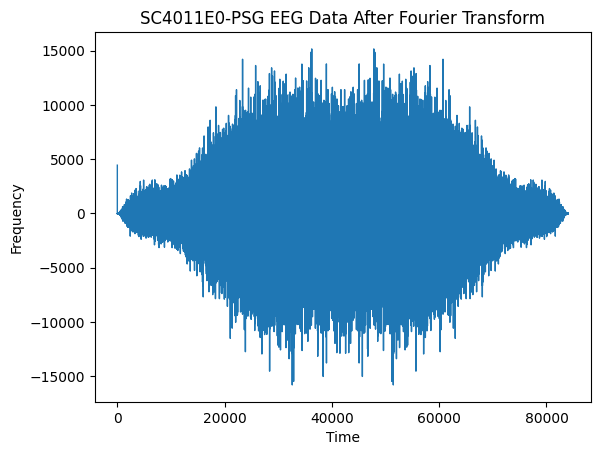

In [25]:
#graph using MatPlotLib
plt.plot(fftArray, linewidth=1)
plt.title("SC4011E0-PSG EEG Data After Fourier Transform")
plt.xlabel("Time")
plt.ylabel("Frequency") #?